In [1]:
# import packages

import numpy as np
from numpy import random
from scipy import stats
import pandas as pd
import copy
import matplotlib.pyplot as plt

# import r packages if needed

import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
#rpackages.importr("clusterGeneration")
#rpackages.importr("mpower")
#cluster_generation = robjects.packages.importr("clusterGeneration")
mpower = robjects.packages.importr("mpower")

In [ ]:
 # Fully Synthetic Data Sets (Set up from Künzel et al.)

# 1: Simulate the d-dimensional X.
# 2: Create Potential Outcomes Y(1) and Y(0).
# 3: Simulate Treatment Assignments trough W.

In [ ]:
########################################################

In [2]:
# 1: Simulate the d-dimensional X


# Setup parameters
d = 25 # TODO: set dimension according to setup
N = 100 # TODO: set sample size according to setup

# X Correlation matrix and mean
mean = np.zeros(d) # TODO: set mean according to setup
cov = np.array(mpower.cvine(d=d, alpha = 0.5, beta = 0.5)) # TODO: set cov according to setup

# Simulate X
X = random.multivariate_normal(mean=mean, cov=cov, size=N, check_valid='warn')

In [3]:
# Check X
X

array([[ 1.01827568, -1.22175785,  0.3241594 , ..., -0.47820989,
         1.32889737,  0.07892889],
       [ 0.17651327, -0.61070957, -0.53833431, ...,  0.32523763,
         0.23241681,  0.52655682],
       [-0.95178956,  1.41899996, -0.2429933 , ...,  0.76789731,
        -1.31946828, -0.17370868],
       ...,
       [-1.16214058,  0.20038298, -0.72689859, ...,  0.27483788,
        -0.4332315 ,  1.00485364],
       [ 0.8051629 , -0.71480403,  0.53794318, ...,  0.53068127,
         1.50619844, -0.23822895],
       [ 0.41952747, -0.49859974,  0.45651576, ..., -0.39169081,
         0.02724371, -0.04177561]])

In [4]:
# Check cov
cov

array([[ 1.        , -0.80481737,  0.84111349,  0.20206871, -0.30887603,
        -0.90661775, -0.7747256 ,  0.63538993,  0.99817536, -0.41945748,
         0.5667118 ,  0.72364865, -0.99896283, -0.29087439, -0.24272114,
         0.99999738,  0.92928895, -0.50557078, -0.99753936, -0.17606868,
        -0.48312046, -0.60116487, -0.50392327,  0.91071768, -0.51792225],
       [-0.80481737,  1.        , -0.49267728,  0.26778278, -0.29869968,
         0.76954275,  0.27949718, -0.76874208, -0.83165001,  0.87419245,
        -0.72967   , -0.38310852,  0.77818415,  0.34443145, -0.06135306,
        -0.80427493, -0.56397512,  0.83445689,  0.82857595,  0.32079591,
         0.53685447,  0.94365784,  0.61420794, -0.81069051,  0.0383984 ],
       [ 0.84111349, -0.49267728,  1.        ,  0.68660157, -0.64768999,
        -0.90813746, -0.88306017,  0.52750813,  0.81689621, -0.088957  ,
         0.06332486,  0.72377435, -0.85973944, -0.28572865, -0.25380399,
         0.84168213,  0.96433976, -0.03614565, -0

In [5]:
#######################################################

In [6]:
# 2: Create Potential Outcomes Y(1) and Y(0).

# 2.1 Simulate errors, FIX
e_0 = random.normal(loc=0.0,scale=1.0,size=N)
e_1 = random.normal(loc=0.0,scale=1.0,size=N)

# if needed take student_t distributed errors to see simulation with heavy-tailed errors

# e_o = random.standard_t(df=1,size=N)
# e_1 = random.standard_t(df=1,size=N)

In [7]:
#######################################################

In [8]:
# 2.2 Create Response Functions

In [9]:
# SI1.1 simple cate - indicator  (no confounding)
betas_0 = random.uniform(low=-5, high=5, size=d)
mu_0 = np.matmul(X,betas_0) + 5*np.int8(X[:,0]>0.5)
mu_1 = mu_0 + 8*np.int8(X[:,1]>0.1) # indicator
tau = mu_1 - mu_0
tau

array([0., 0., 8., 0., 0., 0., 0., 0., 0., 8., 8., 8., 8., 0., 0., 0., 8.,
       8., 0., 0., 8., 8., 0., 0., 0., 0., 0., 8., 0., 0., 8., 8., 0., 0.,
       0., 0., 8., 8., 0., 8., 0., 0., 0., 8., 0., 8., 0., 8., 8., 8., 8.,
       0., 0., 8., 0., 0., 8., 8., 8., 0., 8., 8., 0., 0., 0., 8., 8., 0.,
       8., 0., 8., 8., 0., 0., 0., 0., 0., 8., 0., 0., 0., 8., 8., 0., 0.,
       8., 0., 0., 8., 0., 8., 0., 0., 8., 8., 8., 0., 8., 0., 0.])

In [10]:
# SI1.2 simple cate - linear (no confounding)
betas_0 = random.uniform(low=-5, high=5, size=d)
mu_0 = np.matmul(X,betas_0) + 5*X[:,0]
mu_1 = mu_0 + 8*X[:,1] # linear
tau = mu_1 - mu_0
tau

array([ -9.77406279,  -4.88567654,  11.35199966,  -1.43449973,
        -2.47554172,  -0.31591318,  -5.00529921,  -1.57700652,
         0.63816396,   4.81081536,   1.05364252,   3.46261197,
         2.31010725, -12.32262511, -10.73292155, -13.26698324,
         2.49531211,   4.70584832,  -7.51221143,  -3.0978356 ,
         9.71554734,   4.48750676, -15.73285737,  -9.39092841,
         0.73886109,  -9.9318606 ,  -4.41148694,   4.34591557,
        -2.92519444, -19.71130496,  11.65446825,   3.95011584,
       -14.54659536,  -9.95882217,  -2.93425432,  -3.99529403,
         2.55529109,   3.10617382,  -2.58299216,  11.87918724,
        -3.95168885,   0.21578594,  -8.16663503,   4.72620168,
        -4.98592348,   9.36787464,  -0.93742044,   2.04692885,
         3.36970506,   4.78881376,   8.00894938, -13.91985192,
        -7.21096699,  19.14289422, -14.0551952 ,  -5.96451228,
        16.84505025,   3.34523549,   6.33592334,  -2.39611042,
        13.67893666,   3.75232686,  -3.53562022,  -3.39

In [11]:
# SI1.3 simple cate - quadratic (no confounding)
betas_0 = random.uniform(low=-5, high=5, size=d)
mu_0 = np.matmul(X,betas_0) + 5*(X[:,0]**2)
mu_1 = mu_0 + 8*(X[:,1]**2) # quadratic
tau = mu_1 - mu_0
tau

array([1.19415379e+01, 2.98372941e+00, 1.61084870e+01, 2.57223684e-01,
       7.66038349e-01, 1.24751419e-02, 3.13162752e+00, 3.10868696e-01,
       5.09066551e-02, 2.89299305e+00, 1.38770319e-01, 1.49871021e+00,
       6.67074438e-01, 1.89808862e+01, 1.43994506e+01, 2.20016055e+01,
       7.78322813e-01, 2.76812605e+00, 7.05416507e+00, 1.19957317e+00,
       1.17989825e+01, 2.51721461e+00, 3.09403501e+01, 1.10236921e+01,
       6.82394636e-02, 1.23302319e+01, 2.43265212e+00, 2.36087277e+00,
       1.06959532e+00, 4.85669429e+01, 1.69783288e+01, 1.95042690e+00,
       2.64504296e+01, 1.23972674e+01, 1.07623105e+00, 1.99529680e+00,
       8.16189070e-01, 1.20603948e+00, 8.33981060e-01, 1.76393862e+01,
       1.95198060e+00, 5.82044668e-03, 8.33674097e+00, 2.79212279e+00,
       3.10742912e+00, 1.09696344e+01, 1.09844634e-01, 5.23739715e-01,
       1.41936402e+00, 2.86659215e+00, 8.01790878e+00, 2.42202847e+01,
       6.49975561e+00, 4.58062999e+01, 2.46935640e+01, 4.44692584e+00,
      

In [12]:
#############################################

In [13]:
# SI2 complex linear cate  (in Künzel it is low=1, high=30)
betas_0 = random.uniform(low=-15, high=15, size=d)
betas_1 = random.uniform(low=-15, high=15, size=d)
mu_0 = np.matmul(X,betas_0)
mu_1 = np.matmul(X,betas_1)
tau = mu_1 - mu_0

In [14]:
###############################################

In [15]:
def varsigma_funct(x):
    return 2/(1+np.exp(-12*(x-1/2)))

In [16]:
# SI3 complex non-linear
mu_0 = -1/2*varsigma_funct(x=X[:,0])*varsigma_funct(x=X[:,1])
mu_1 = 1/2*varsigma_funct(x=X[:,0])*varsigma_funct(x=X[:,1])
tau = mu_1 - mu_0

In [17]:
#############################################

In [18]:
# SI4 no treatment effect (global linear response)
betas_noT = random.uniform(low=-15, high=15, size=d)
mu_0 = np.matmul(X,betas_noT)
mu_1 = mu_0
tau = np.zeros(N)

In [19]:
###########################################

In [20]:
# SI5 no treatment effect (piecewise linear response)
betas = np.random.uniform(low=-15, high=15, size=d)

betas_l = copy.copy(betas) # betas_lower
betas_l[5:d] = 0

betas_m = copy.copy(betas) #betas_middle
betas_m[0:5] = 0
betas_m[10:d] = 0

betas_u = copy.copy(betas) #betas_upper
betas_u[0:10] = 0
betas_u[15:d] = 0

def piecewise_linear_new(x):
    condition_l = x[:, 19] < -0.4
    condition_u = x[:, 19] > 0.4

    array = np.zeros(N)
    array[condition_l] = np.matmul(x[condition_l, :], betas_l)
    array[~condition_l & ~condition_u] = np.matmul(x[~condition_l & ~condition_u, :], betas_m)
    array[condition_u] = np.matmul(x[condition_u, :], betas_u)

    return array

mu_0 = piecewise_linear_new(X)

mu_1 = mu_0

tau = np.zeros(N)

# TODO: CHECK IF RIGHT

In [21]:
##########################################

In [22]:
# SI6.1 beta confounded, no treatment effect
X = random.uniform(low=0, high=1, size=(N,d)) # ACHTUNG: nöd wiederhole!
mu_0 = 2*X[:,0] - 1
mu_1 = mu_0
tau = np.zeros(N)


In [23]:
# SI6.2 beta confounded, simple cate (indicator)
X = random.uniform(low=0, high=1, size=(N,d))
mu_0 = 2*X[:,0] - 1
mu_1 = mu_0 + 2*np.int8(X[:,1]>0.4)
tau = mu_1 - mu_0
tau

array([2., 0., 2., 0., 2., 0., 0., 2., 0., 2., 2., 0., 2., 0., 2., 0., 2.,
       2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2.,
       0., 2., 2., 2., 2., 2., 0., 2., 0., 2., 0., 0., 2., 2., 2., 0., 2.,
       0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 0., 0., 2., 0., 2., 0.,
       2., 0., 0., 0., 2., 2., 2., 0., 0., 2., 0., 2., 0., 2., 0.])

In [24]:
# SI6.3 beta confounded, simple cate (linear)
X = random.uniform(low=0, high=1, size=(N,d))
mu_0 = 2*X[:,0] - 1
mu_1 = mu_0 + 2*X[:,1]
tau = mu_1 - mu_0


In [25]:
# SI6.4 beta confounded, simple cate (quadratic)
X = random.uniform(low=0, high=1, size=(N,d))
mu_0 = 2*X[:,0] - 1
mu_1 = mu_0 + 2*(X[:,1]**2)
tau = mu_1 - mu_0
tau

array([4.09973679e-02, 3.53090445e-01, 4.16683982e-01, 5.24826949e-02,
       1.84664516e+00, 1.63266715e+00, 3.43916166e-01, 1.46779506e+00,
       1.33990140e+00, 3.73282858e-01, 1.32710064e+00, 8.12842790e-01,
       4.41742571e-01, 2.79418384e-01, 1.97021923e+00, 1.02698317e-02,
       1.88257392e+00, 6.17586868e-01, 4.40760463e-02, 2.11538443e-02,
       1.31403573e+00, 4.66949973e-02, 2.38965963e-04, 9.71044399e-01,
       8.44512599e-01, 9.69100271e-01, 1.29447261e+00, 1.21475773e+00,
       1.17736647e+00, 1.30474047e-01, 1.18655054e-01, 4.59300667e-01,
       9.66593261e-02, 2.95402062e-01, 5.51977378e-03, 6.31811318e-02,
       8.00910023e-01, 1.32024307e-01, 9.35892366e-01, 2.21613778e-03,
       1.81048483e+00, 1.09658980e+00, 1.00133387e+00, 7.29894547e-01,
       1.79072180e+00, 4.13883352e-01, 1.38264649e+00, 4.08498680e-01,
       2.14162574e-01, 6.34189642e-02, 1.81950824e+00, 1.54850345e+00,
       2.52260112e-03, 8.66131638e-01, 5.77169381e-01, 2.29696734e-01,
      

In [26]:
##################################

In [27]:
# SI7.1 beta confounded, complex cate (linear)
betas = random.uniform(low=-15, high=15, size=d)

mu_0 = 2*X[:,0] - 1
mu_1 = mu_0 + np.matmul(X,betas)
tau = mu_1 - mu_0

# TODO: CHECK WHETHER THIS SETUP MAKES SENSE

In [28]:
# SI7.2 beta confounded, complex cate (non-linear)
mu_0 = 2*X[:,0] - 1
mu_1 = mu_0 + 1/2*varsigma_funct(x=X[:,0])*varsigma_funct(x=X[:,1])

# TODO: CHECK WHETER THIS SETUP MAKES SENSE

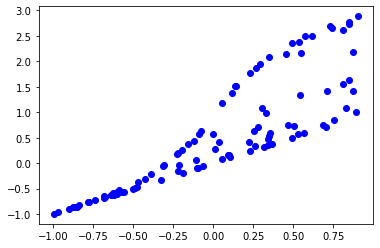

In [29]:
# TODO: check relationship between mu_0 & mu_1 and see whether this makes sense
check_values_0 = 2*X[:,0] - 1
check_values_1 = mu_0 + 1/2*varsigma_funct(x=X[:,0])*varsigma_funct(x=X[:,1])
check_values_2 = mu_0 + np.matmul(X,betas)

plt.plot(check_values_0, check_values_1, 'bo')
plt.show()

In [30]:
###################################
# 2.3 Creat Potential Outcomes, FIX
Y_0 = mu_0 + e_0
Y_1 = mu_1 + e_1

In [31]:
# quick check Y_0
Y_0

array([-0.64255236,  0.49344831,  1.51594513, -2.49262456, -0.57006619,
       -1.18474955,  0.78704005,  0.2399397 , -0.20207811, -1.247477  ,
       -0.57019402, -0.50598152,  1.36109392, -0.52334538, -0.14136421,
       -0.91194342,  0.12354454, -0.30966589,  2.04443655, -0.38527444,
        2.62464122,  0.08319752, -0.10189279, -0.4830781 ,  0.09162702,
        1.55536423,  0.51180559, -0.57829389, -0.20478022,  0.15600078,
       -1.95139482, -1.73197585, -0.77838914, -1.83689964,  0.4488138 ,
        0.22695333, -0.64308377, -0.95428453,  1.55821153,  2.1796228 ,
        0.62881585, -0.31053621, -0.03251037, -0.71395207, -0.50801135,
       -0.20255685, -0.25786546,  1.08164691,  0.46104455, -0.40394979,
       -1.06321112, -1.45199947, -2.2761072 , -1.58972551, -0.60522413,
       -1.28768122,  1.21767978, -0.58541458,  1.10109314, -0.73798476,
       -1.07033373,  1.20262911,  0.64032646,  0.86587838,  0.55750317,
       -0.63862764,  1.01481531, -0.48261051,  0.71838291,  1.62

In [32]:
# Quick Check Y_1
Y_1

array([-0.46834046,  3.55731467,  0.59277086, -2.19028343,  3.72710004,
        1.36359235,  0.15769016,  0.73861465,  0.78561221, -2.54943622,
        0.29411148, -1.06685898,  0.67078827, -0.54230235,  0.64040798,
        0.02155924,  0.73538893,  1.64493959,  1.63320506,  0.76415955,
        2.00908345, -2.41099976,  1.27209391, -2.11014801,  0.22924888,
        2.26516693, -0.46965094,  0.13124552,  1.82917439,  1.32497533,
        0.11483644, -1.02783189,  0.07125144, -0.76961546,  1.4021317 ,
       -2.40499566, -2.04914564, -1.43823347,  3.15263161,  0.60441309,
        1.97571102,  2.92799731,  0.05437008, -0.473967  ,  2.01598267,
        1.8820431 , -0.44270888,  2.99582242,  0.54581499,  1.41517425,
       -1.33340804, -0.70848335,  1.74916833, -0.47994196,  1.15667143,
       -0.14253586,  0.09994067,  0.03134754,  3.1081801 , -1.5345154 ,
       -2.83846155,  3.48423269, -1.36976186,  0.09739668,  1.62825821,
        1.2335352 ,  0.430847  ,  2.58121319, -1.12156824,  2.57

In [33]:
###################################
# 3.1 Propensity score setups # TODO: change for setup

# i) constant, balanced
e_x = 0.5

# ii) constant, unbalanced
e_x = 0.01

In [34]:
#################################

In [35]:
# iii) beta confounded (balanced)
X = random.uniform(low=0, high=1, size=(N,d))
beta_dist = stats.beta(a=2, b=4) # set beta distribution
beta_values = beta_dist.pdf(X[:,0]) # calculate pdf values for x1
e_x = 1/4*(1+beta_values)

pd.DataFrame(e_x).describe() # summary stats of e_x

,0
count,100.000000
mean,0.504736
std,0.186446
min,0.250029
25%,0.327038
50%,0.499132
75%,0.677690
max,0.777313


In [36]:
# check if balanced
W = random.binomial(size=N, n=1, p=e_x)
pd.DataFrame(W).describe()

,0
count,100.000000
mean,0.500000
std,0.502519
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [37]:
#####################################

In [38]:
# iv) beta confounded (unbalanced)
X = random.uniform(low=0, high=1, size=(N,d))
beta_dist = stats.beta(a=1, b=10) # set beta distribution
beta_values = beta_dist.pdf(X[:,0]) # calculate pdf values for x1
e_x = 1/100*(1+beta_values)

pd.DataFrame(e_x).describe() # summary stats of e_x

,0
count,100.000000
mean,0.016810
std,0.014929
min,0.010000
25%,0.010001
50%,0.010106
75%,0.015559
max,0.087379


In [39]:
# check if unbalanced and how much
W = random.binomial(size=N, n=1, p=e_x)
pd.DataFrame(W).describe()

,0
count,100.00
mean,0.01
std,0.10
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


In [40]:
##########################################

In [41]:
X

array([[0.22852979, 0.76456239, 0.79264084, ..., 0.99016491, 0.75101556,
        0.88276558],
       [0.1310484 , 0.02070483, 0.73569217, ..., 0.54200619, 0.02730717,
        0.19505833],
       [0.40425977, 0.82806082, 0.04877205, ..., 0.6397586 , 0.23446409,
        0.87367905],
       ...,
       [0.33331228, 0.35481765, 0.37099436, ..., 0.99578922, 0.20914856,
        0.9496869 ],
       [0.11611723, 0.35706846, 0.85100794, ..., 0.77457048, 0.6685323 ,
        0.99782481],
       [0.72336763, 0.50789637, 0.48675383, ..., 0.3073113 , 0.27427361,
        0.28646259]])

In [42]:
###################################

In [43]:
# 3.2 Simulate Treatment Assignments trough W

# Simulate Treatment Assignment, FIX
W = random.binomial(size=N, n=1, p=e_x)

# Create Observed Outcome, FIX
ones = np.ones(N)
Y = np.multiply(W,Y_1) + np.multiply(ones-W,Y_0)

In [44]:
pd.DataFrame(e_x).describe() # summary stats of e_x

,0
count,100.000000
mean,0.016810
std,0.014929
min,0.010000
25%,0.010001
50%,0.010106
75%,0.015559
max,0.087379


In [45]:
# check out observed outcomes
Y

array([-0.64255236,  0.49344831,  1.51594513, -2.49262456, -0.57006619,
       -1.18474955,  0.78704005,  0.2399397 , -0.20207811, -1.247477  ,
       -0.57019402, -0.50598152,  1.36109392, -0.52334538, -0.14136421,
       -0.91194342,  0.12354454, -0.30966589,  2.04443655, -0.38527444,
        2.62464122,  0.08319752, -0.10189279, -0.4830781 ,  0.09162702,
        1.55536423,  0.51180559, -0.57829389, -0.20478022,  0.15600078,
       -1.95139482, -1.73197585, -0.77838914, -1.83689964,  0.4488138 ,
        0.22695333, -0.64308377, -0.95428453,  1.55821153,  2.1796228 ,
        0.62881585, -0.31053621, -0.03251037, -0.71395207, -0.50801135,
       -0.20255685, -0.25786546,  1.08164691,  0.46104455, -0.40394979,
       -1.06321112, -1.45199947, -2.2761072 , -1.58972551, -0.60522413,
       -1.28768122,  1.21767978, -0.58541458,  1.10109314, -0.73798476,
       -1.07033373,  3.48423269,  0.64032646,  0.86587838,  0.55750317,
       -0.63862764,  1.01481531, -0.48261051,  0.71838291,  1.62

In [46]:
pd.DataFrame(Y).describe() # summary stats of Y

,0
count,100.000000
mean,-0.108631
std,1.088863
min,-2.573246
25%,-0.692318
50%,-0.233895
75%,0.568437
max,3.484233


In [47]:
X

array([[0.22852979, 0.76456239, 0.79264084, ..., 0.99016491, 0.75101556,
        0.88276558],
       [0.1310484 , 0.02070483, 0.73569217, ..., 0.54200619, 0.02730717,
        0.19505833],
       [0.40425977, 0.82806082, 0.04877205, ..., 0.6397586 , 0.23446409,
        0.87367905],
       ...,
       [0.33331228, 0.35481765, 0.37099436, ..., 0.99578922, 0.20914856,
        0.9496869 ],
       [0.11611723, 0.35706846, 0.85100794, ..., 0.77457048, 0.6685323 ,
        0.99782481],
       [0.72336763, 0.50789637, 0.48675383, ..., 0.3073113 , 0.27427361,
        0.28646259]])

In [48]:
Y

array([-0.64255236,  0.49344831,  1.51594513, -2.49262456, -0.57006619,
       -1.18474955,  0.78704005,  0.2399397 , -0.20207811, -1.247477  ,
       -0.57019402, -0.50598152,  1.36109392, -0.52334538, -0.14136421,
       -0.91194342,  0.12354454, -0.30966589,  2.04443655, -0.38527444,
        2.62464122,  0.08319752, -0.10189279, -0.4830781 ,  0.09162702,
        1.55536423,  0.51180559, -0.57829389, -0.20478022,  0.15600078,
       -1.95139482, -1.73197585, -0.77838914, -1.83689964,  0.4488138 ,
        0.22695333, -0.64308377, -0.95428453,  1.55821153,  2.1796228 ,
        0.62881585, -0.31053621, -0.03251037, -0.71395207, -0.50801135,
       -0.20255685, -0.25786546,  1.08164691,  0.46104455, -0.40394979,
       -1.06321112, -1.45199947, -2.2761072 , -1.58972551, -0.60522413,
       -1.28768122,  1.21767978, -0.58541458,  1.10109314, -0.73798476,
       -1.07033373,  3.48423269,  0.64032646,  0.86587838,  0.55750317,
       -0.63862764,  1.01481531, -0.48261051,  0.71838291,  1.62